In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
input_m0=pd.read_csv('入力応答のm0_1峰.csv', engine='python',header=None)
input_m0=np.array(input_m0.values)#m0,m1,m0,m1,,,
print(np.shape(input_m0))
output_m0=pd.read_csv('再現応答m0.csv', engine='python',header=None)
output_m0=np.array(output_m0.values)#m0,海象パラメーター
print(np.shape(output_m0))
parameters=pd.read_csv('入力応答と推定結果.csv', engine='python',header=None)
parameters=np.array(parameters.values[:,16*71:])#16*71+正解5パラ+推定5パラ
print(np.shape(parameters))

(14000, 8)
(14000, 9)
(14000, 11)


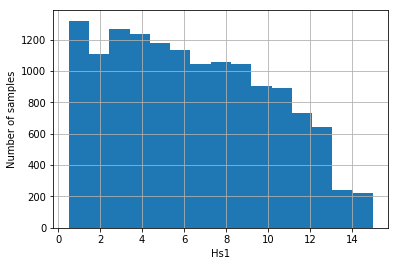

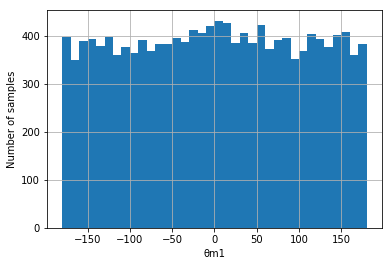

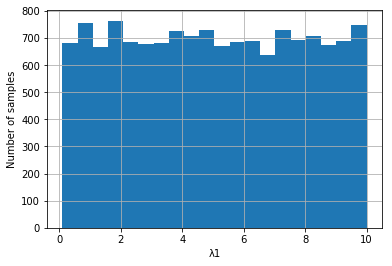

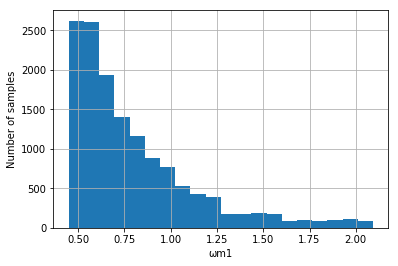

In [3]:
plt.hist(parameters[:,0],bins=15)
plt.xlabel('Hs1')
plt.ylabel('Number of samples')
plt.grid()
plt.show()

plt.hist(np.arctan2(parameters[:,2],parameters[:,1])*180/np.pi,bins=36)
plt.xlabel('θm1')
plt.ylabel('Number of samples')
plt.grid()
plt.show()

plt.hist(parameters[:,3],bins=20)
plt.xlabel('λ1')
plt.ylabel('Number of samples')
plt.grid()
plt.show()

plt.hist(parameters[:,4],bins=20)
plt.xlabel('ωm1')
plt.ylabel('Number of samples')
plt.grid()
plt.show()

### 波向き推定誤差

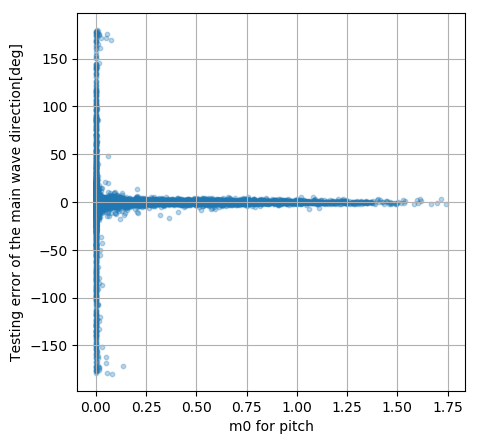

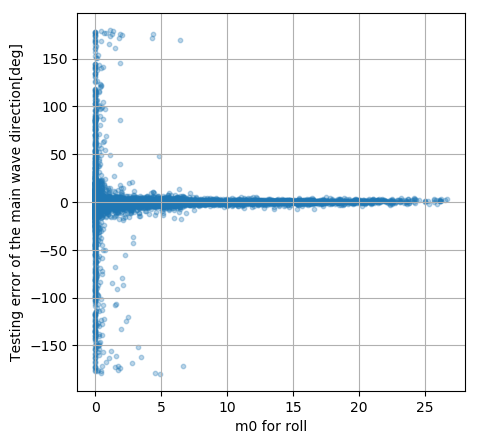

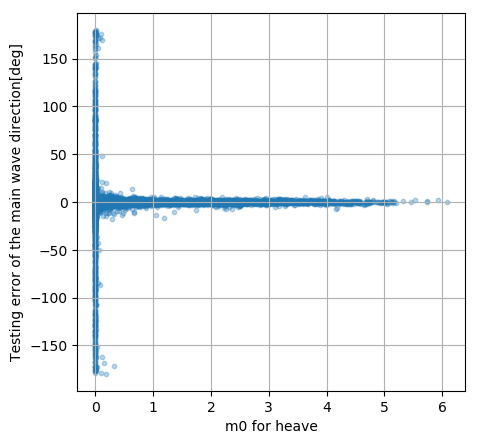

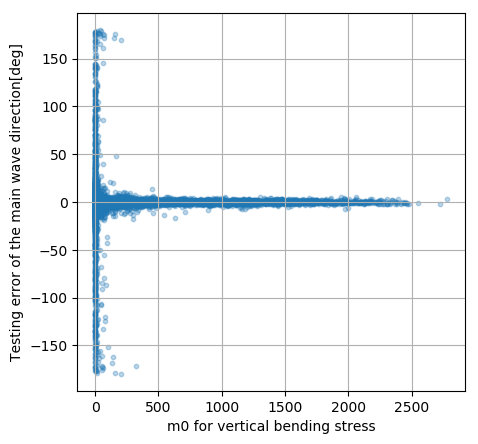

In [4]:
sin_est=np.array(parameters[:,7])
cos_est=np.array(parameters[:,6])
sin_tar=np.array(parameters[:,2])
cos_tar=np.array(parameters[:,1])
a=[-theta_diff if np.abs(theta_diff) <=180 else np.abs(theta_diff)/(theta_diff)*(360-np.abs(theta_diff)) for theta_diff in (np.arctan2(sin_est,cos_est)-np.arctan2(sin_tar,cos_tar))*180/np.pi]

plt.figure(figsize=(5,5), dpi=100)
plt.scatter(input_m0[:,0],a,s=10, alpha=0.3)
plt.xlabel('m0 for pitch')
plt.ylabel('Testing error of the main wave direction[deg]')
#plt.ylim(-2,2)
plt.grid()
plt.show()

plt.figure(figsize=(5,5), dpi=100)
plt.scatter(input_m0[:,2],a,s=10, alpha=0.3)
plt.xlabel('m0 for roll')
plt.ylabel('Testing error of the main wave direction[deg]')
#plt.ylim(-2,2)
plt.grid()
plt.show()

plt.figure(figsize=(5,5), dpi=100)
plt.scatter(input_m0[:,4],a,s=10, alpha=0.3)
plt.xlabel('m0 for heave')
plt.ylabel('Testing error of the main wave direction[deg]')
#plt.ylim(-2,2)
plt.grid()
plt.show()

plt.figure(figsize=(5,5), dpi=100)
plt.scatter(input_m0[:,6],a,s=10, alpha=0.3)
plt.xlabel('m0 for vertical bending stress')
plt.ylabel('Testing error of the main wave direction[deg]')
#plt.ylim(-2,2)
plt.grid()
plt.show()

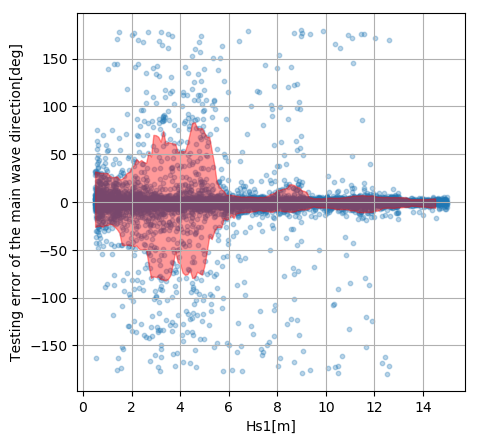

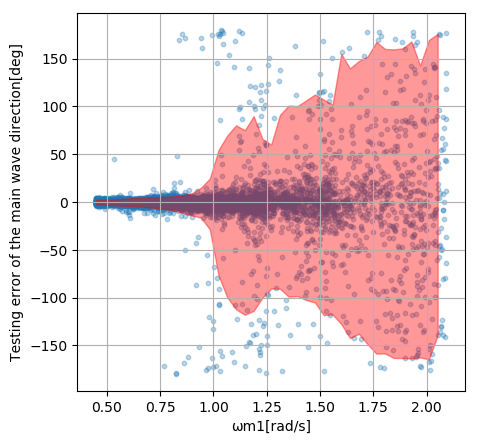

In [113]:
a=np.array([-theta_diff if np.abs(theta_diff) <=180 else np.abs(theta_diff)/(theta_diff)*(360-np.abs(theta_diff)) 
   for theta_diff in (np.arctan2(parameters[:,7],parameters[:,6])-np.arctan2(parameters[:,2],parameters[:,1]))*180/np.pi])

up=np.zeros(141)
down=np.zeros(141)
for i in range(141):
    b=a[((parameters[:,0]-i/10)*(parameters[:,0]-i/10-1) <= 0)]
    up[i]=np.percentile(b,q=[2.5,97.5])[1]
    down[i]=np.percentile(b,q=[2.5,97.5])[0]

plt.figure(figsize=(5,5), dpi=100)
plt.scatter(parameters[:,0],a,s=10, alpha=0.3)
plt.fill_between(np.arange(141)/10+0.5,up,down,color='red',alpha=0.4)
plt.xlabel('Hs1[m]')
plt.ylabel('Testing error of the main wave direction[deg]')
#plt.ylim(-2,2)
plt.grid()
plt.show()



up=np.zeros(40)
down=np.zeros(40)
diff=np.max(parameters[:,4])-np.min(parameters[:,4])
for i in range(40):
    b=a[((parameters[:,4]-i*diff/40-np.min(parameters[:,4]))*(parameters[:,4]-i*diff/40-np.min(parameters[:,4])-0.2) <= 0)]
    up[i]=np.percentile(b,q=[2.5,97.5])[1]
    down[i]=np.percentile(b,q=[2.5,97.5])[0]

plt.figure(figsize=(5,5), dpi=100)
plt.scatter(parameters[:,4],a,s=10, alpha=0.3)
plt.fill_between(np.arange(40)*diff/40+np.min(parameters[:,4]),up,down,color='red',alpha=0.4)
plt.xlabel('ωm1[rad/s]')
plt.ylabel('Testing error of the main wave direction[deg]')
#plt.ylim(-2,2)
plt.grid()
plt.show()

## 波高の推定誤差

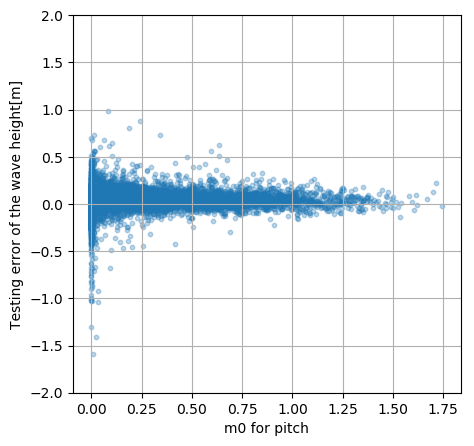

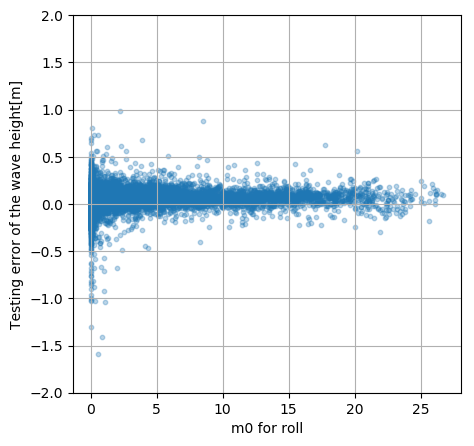

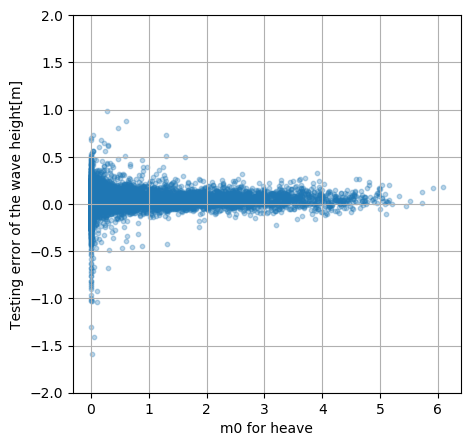

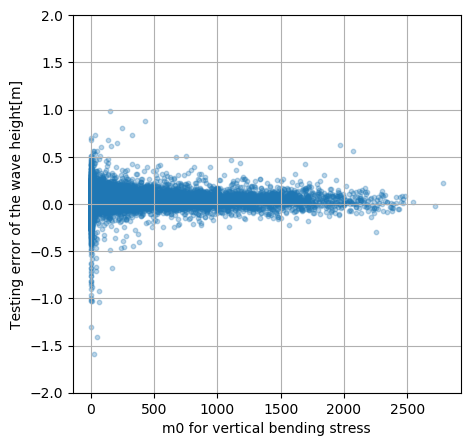

In [62]:
plt.figure(figsize=(5,5), dpi=100)
plt.scatter(input_m0[:,0],parameters[:,5]-parameters[:,0],s=10, alpha=0.3)
plt.xlabel('m0 for pitch')
plt.ylabel('Testing error of the wave height[m]')
plt.ylim(-2,2)
plt.grid()
plt.show()

plt.figure(figsize=(5,5), dpi=100)
plt.scatter(input_m0[:,2],parameters[:,5]-parameters[:,0],s=10, alpha=0.3)
plt.xlabel('m0 for roll')
plt.ylabel('Testing error of the wave height[m]')
plt.ylim(-2,2)
plt.grid()
plt.show()

plt.figure(figsize=(5,5), dpi=100)
plt.scatter(input_m0[:,4],parameters[:,5]-parameters[:,0],s=10, alpha=0.3)
plt.xlabel('m0 for heave')
plt.ylabel('Testing error of the wave height[m]')
plt.ylim(-2,2)
plt.grid()
plt.show()

plt.figure(figsize=(5,5), dpi=100)
plt.scatter(input_m0[:,6],parameters[:,5]-parameters[:,0],s=10, alpha=0.3)
plt.xlabel('m0 for vertical bending stress')
plt.ylabel('Testing error of the wave height[m]')
plt.ylim(-2,2)
plt.grid()
plt.show()

## 尖度の推定誤差

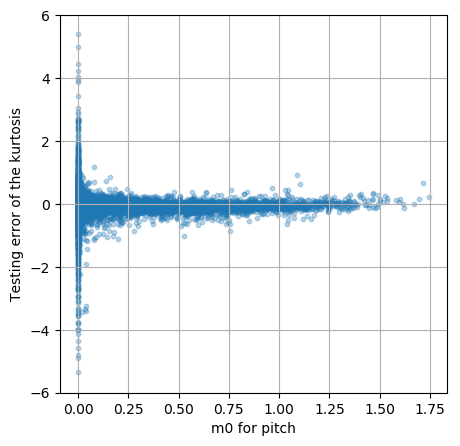

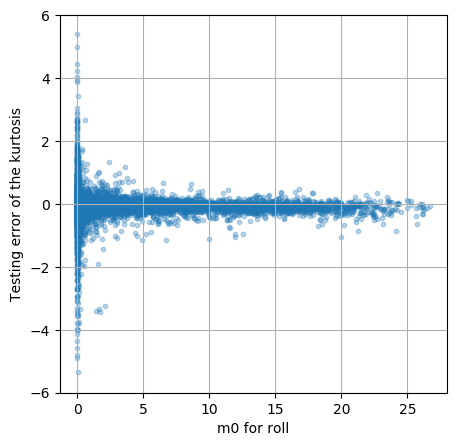

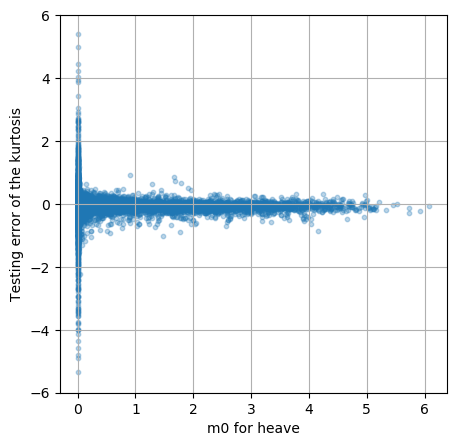

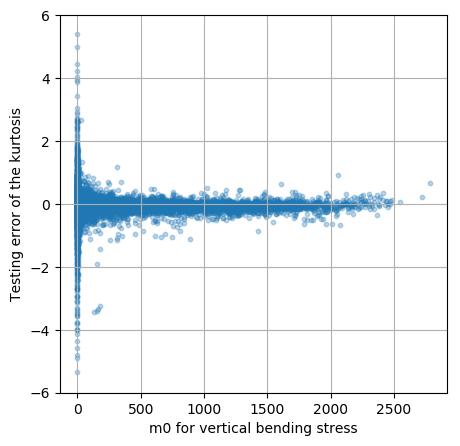

In [6]:
plt.figure(figsize=(5,5), dpi=100)
plt.scatter(input_m0[:,0],parameters[:,8]-parameters[:,3],s=10, alpha=0.3)
plt.xlabel('m0 for pitch')
plt.ylabel('Testing error of the kurtosis')
plt.ylim(-6,6)
plt.grid()
plt.show()

plt.figure(figsize=(5,5), dpi=100)
plt.scatter(input_m0[:,2],parameters[:,8]-parameters[:,3],s=10, alpha=0.3)
plt.xlabel('m0 for roll')
plt.ylabel('Testing error of the kurtosis')
plt.ylim(-6,6)
plt.grid()
plt.show()

plt.figure(figsize=(5,5), dpi=100)
plt.scatter(input_m0[:,4],parameters[:,8]-parameters[:,3],s=10, alpha=0.3)
plt.xlabel('m0 for heave')
plt.ylabel('Testing error of the kurtosis')
plt.ylim(-6,6)
plt.grid()
plt.show()

plt.figure(figsize=(5,5), dpi=100)
plt.scatter(input_m0[:,6],parameters[:,8]-parameters[:,3],s=10, alpha=0.3)
plt.xlabel('m0 for vertical bending stress')
plt.ylabel('Testing error of the kurtosis')
plt.ylim(-6,6)
plt.grid()
plt.show()

## 波周波数の推定誤差

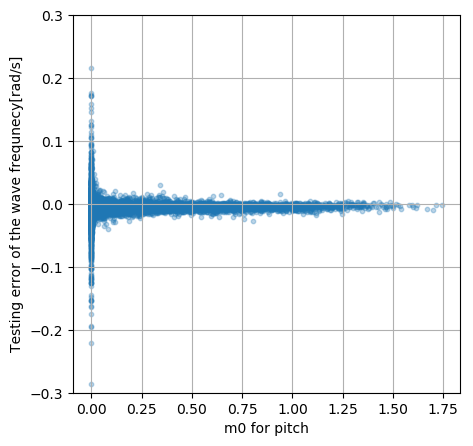

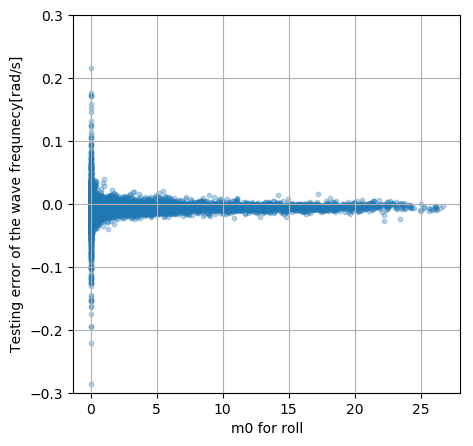

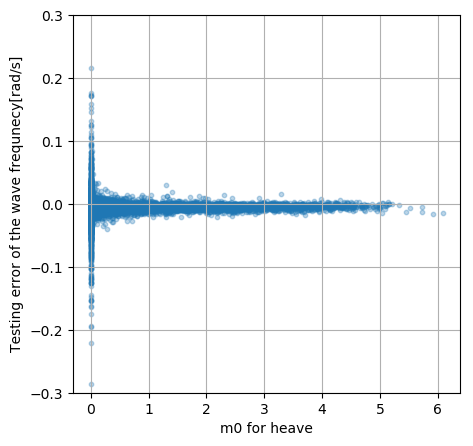

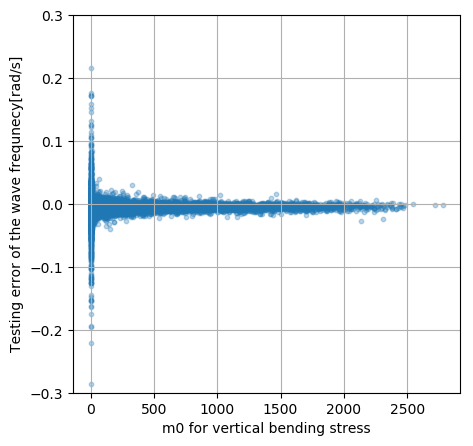

In [7]:
plt.figure(figsize=(5,5), dpi=100)
plt.scatter(input_m0[:,0],parameters[:,9]-parameters[:,4],s=10, alpha=0.3)
plt.xlabel('m0 for pitch')
plt.ylabel('Testing error of the wave frequnecy[rad/s]')
plt.ylim(-0.3,0.3)
plt.grid()
plt.show()

plt.figure(figsize=(5,5), dpi=100)
plt.scatter(input_m0[:,2],parameters[:,9]-parameters[:,4],s=10, alpha=0.3)
plt.xlabel('m0 for roll')
plt.ylabel('Testing error of the wave frequnecy[rad/s]')
plt.ylim(-0.3,0.3)
plt.grid()
plt.show()

plt.figure(figsize=(5,5), dpi=100)
plt.scatter(input_m0[:,4],parameters[:,9]-parameters[:,4],s=10, alpha=0.3)
plt.xlabel('m0 for heave')
plt.ylabel('Testing error of the wave frequnecy[rad/s]')
plt.ylim(-0.3,0.3)
plt.grid()
plt.show()

plt.figure(figsize=(5,5), dpi=100)
plt.scatter(input_m0[:,6],parameters[:,9]-parameters[:,4],s=10, alpha=0.3)
plt.xlabel('m0 for vertical bending stress')
plt.ylabel('Testing error of the wave frequnecy[rad/s]')
plt.ylim(-0.3,0.3)
plt.grid()
plt.show()

### 各パラメーターの推定誤差のヒストグラム

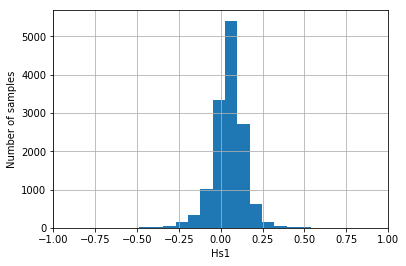

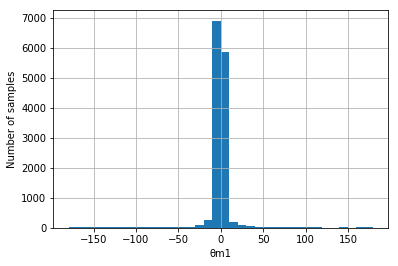

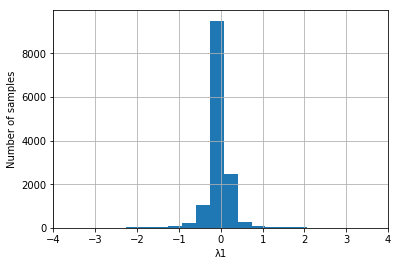

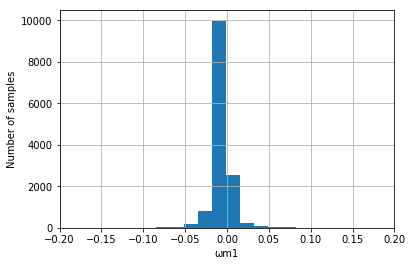

In [27]:
plt.hist(parameters[:,5]-parameters[:,0],bins=35)
plt.xlim(-1,1)
plt.xlabel('Hs1')
plt.ylabel('Number of samples')
plt.grid()
plt.show()

plt.hist(a,bins=36)
plt.xlabel('θm1')
plt.ylabel('Number of samples')
plt.grid()
plt.show()

plt.hist(parameters[:,8]-parameters[:,3],bins=35)
plt.xlabel('λ1')
plt.ylabel('Number of samples')
plt.xlim(-4,4)
plt.grid()
plt.show()

plt.hist(parameters[:,9]-parameters[:,4],bins=30)
plt.xlabel('ωm1')
plt.ylabel('Number of samples')
plt.xlim(-0.2,0.2)
plt.grid()
plt.show()

## 入力応答のm0と再現応答のm0比較

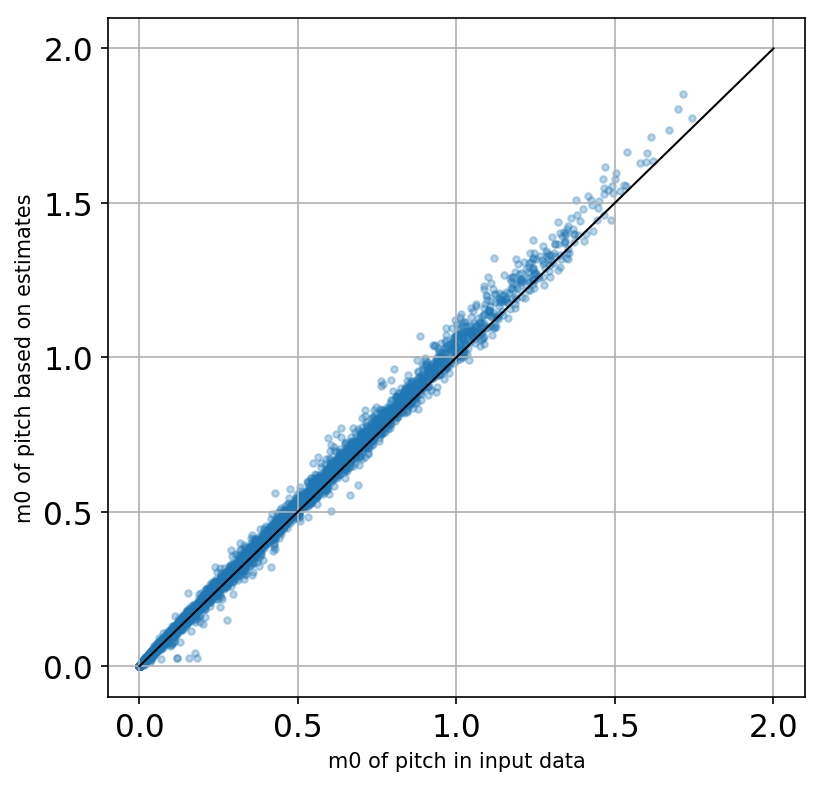

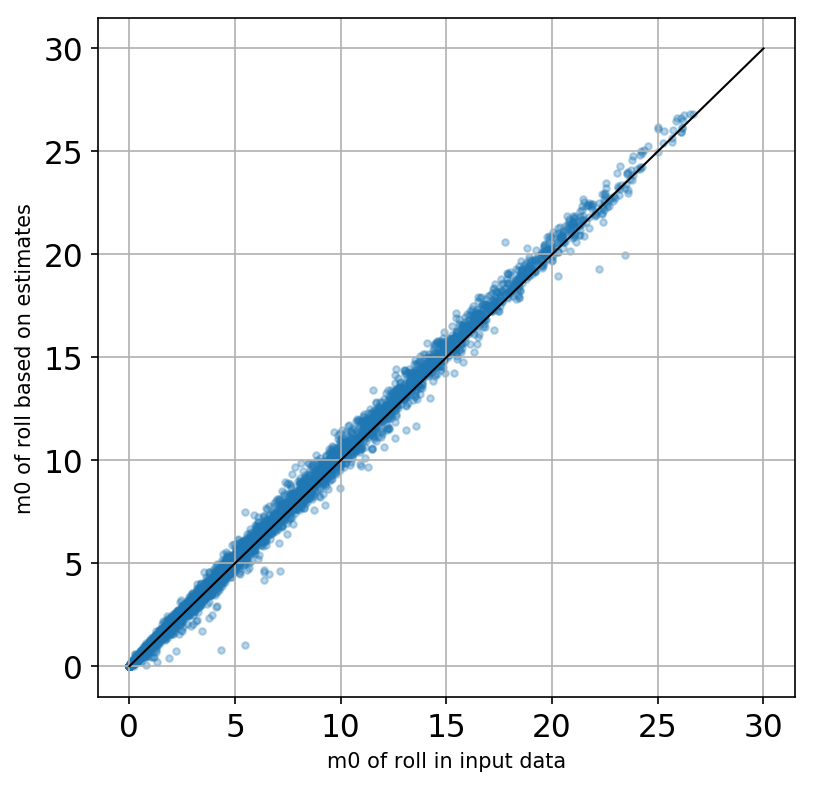

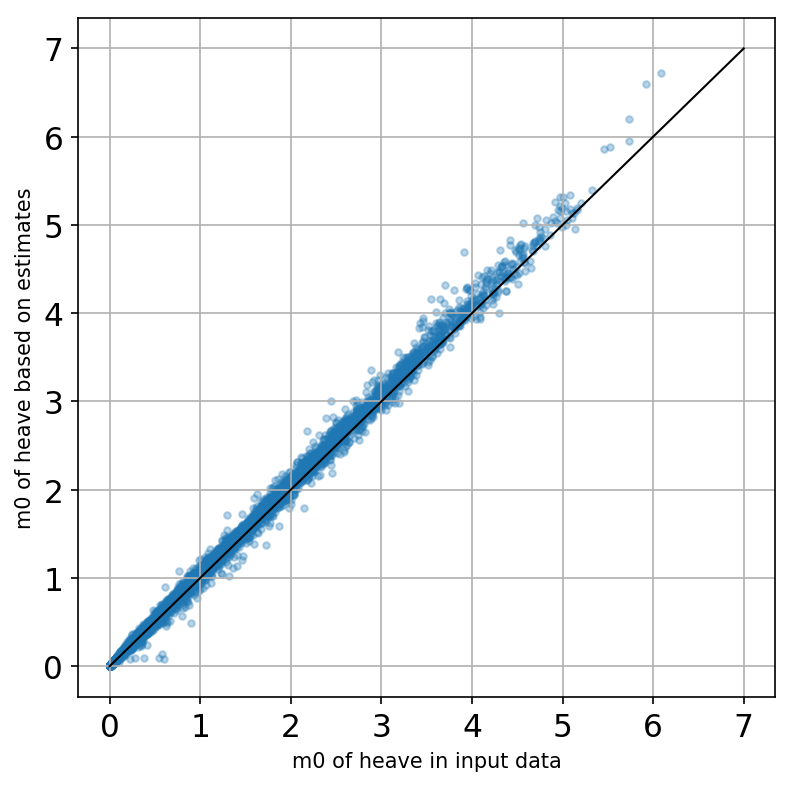

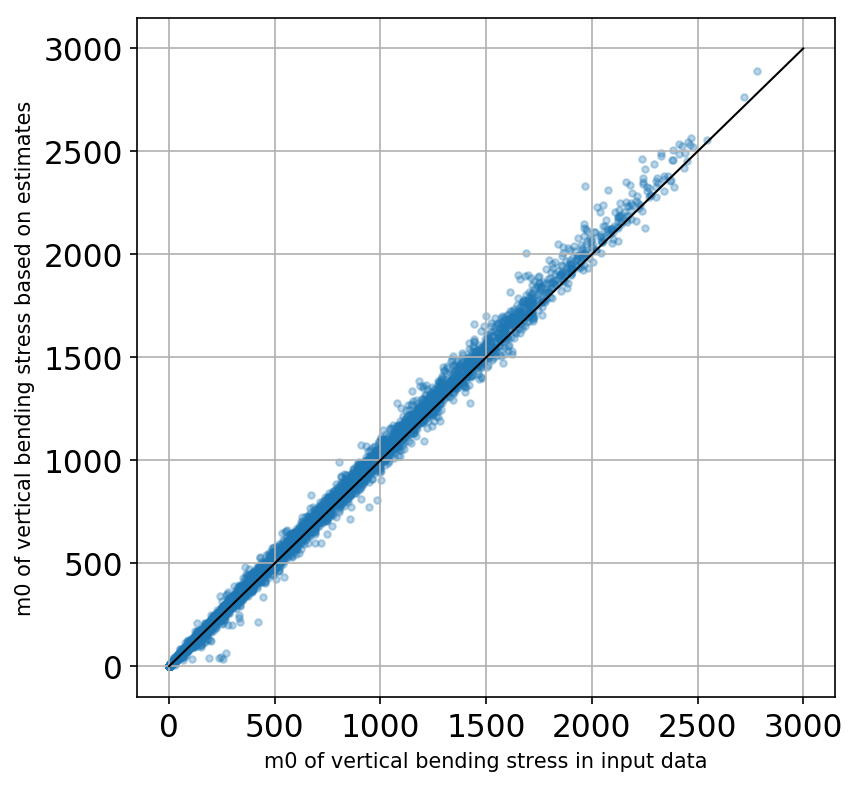

In [101]:
plt.figure(figsize=(6, 6), dpi=150)
plt.tick_params(labelsize=15)
plt.locator_params(axis='x',nbins=8)
plt.locator_params(axis='y',nbins=8)
plt.scatter(input_m0[:,0],output_m0[:,0],s=10, alpha=0.3)
plt.plot([0,2],[0,2],color='black',linewidth=1)
plt.xlabel('m0 of pitch in input data')
plt.ylabel('m0 of pitch based on estimates')
#plt.ylim(-2,2)
plt.grid()
plt.show()

plt.figure(figsize=(6, 6), dpi=150)
plt.tick_params(labelsize=15)
plt.scatter(input_m0[:,2],output_m0[:,1],s=10, alpha=0.3)
plt.plot([0,30],[0,30],color='black',linewidth=1)
plt.xlabel('m0 of roll in input data')
plt.ylabel('m0 of roll based on estimates')
#plt.ylim(-2,2)
plt.grid()
plt.show()

plt.figure(figsize=(6, 6), dpi=150)
plt.tick_params(labelsize=15)
plt.locator_params(axis='x',nbins=8)
plt.locator_params(axis='y',nbins=8)
plt.scatter(input_m0[:,4],output_m0[:,2],s=10, alpha=0.3)
plt.plot([0,7],[0,7],color='black',linewidth=1)
plt.xlabel('m0 of heave in input data')
plt.ylabel('m0 of heave based on estimates')
#plt.ylim(-2,2)
plt.grid()
plt.show()

plt.figure(figsize=(6, 6), dpi=150)
plt.tick_params(labelsize=15)
plt.scatter(input_m0[:,6],output_m0[:,3],s=10, alpha=0.3)
plt.plot([0,3000],[0,3000],color='black',linewidth=1)
plt.xlabel('m0 of vertical bending stress in input data')
plt.ylabel('m0 of vertical bending stress based on estimates')
#plt.ylim(-2,2)
plt.grid()
plt.show()

In [82]:
def corre_factor(retsu):
    X=np.array(input_m0[:,2*retsu])
    Y=np.array(output_m0[:,retsu])
    E_xx=np.sum((X-np.mean(X))**2)
    E_yy=np.sum((Y-np.mean(Y))**2)
    E_xy=np.sum((X-np.mean(X))*(Y-np.mean(Y)))
    return E_xy/np.sqrt(E_xx)/np.sqrt(E_yy)
df=pd.DataFrame([['Pitch',corre_factor(0)],['Roll',corre_factor(1)],['Heave',corre_factor(2)],['Stress',corre_factor(3)]])

In [83]:
df

,0,1
0,Pitch,0.998939
1,Roll,0.998913
2,Heave,0.998992
3,Stress,0.998966


# 全パラメータを合計した推定誤差の傾向を調べる

In [89]:
"""データの最大値と最小値を保存"""
col_max0 =parameters.max(axis=0)
col_min0 =parameters.min(axis=0) 

"""損失を計算"""
def cal_loss(retsu,est_y,tar_y,row):
    return np.mean(np.abs(est_y[row,retsu+5]-tar_y[row,retsu]))/(col_max0[retsu:retsu+1]-col_min0[retsu:retsu+1])

loss_all      = np.array([np.mean([cal_loss(retsu,parameters,parameters,row) for retsu in range(5)]) for row in range(14000)])
print(np.shape(loss_all))

(14000,)


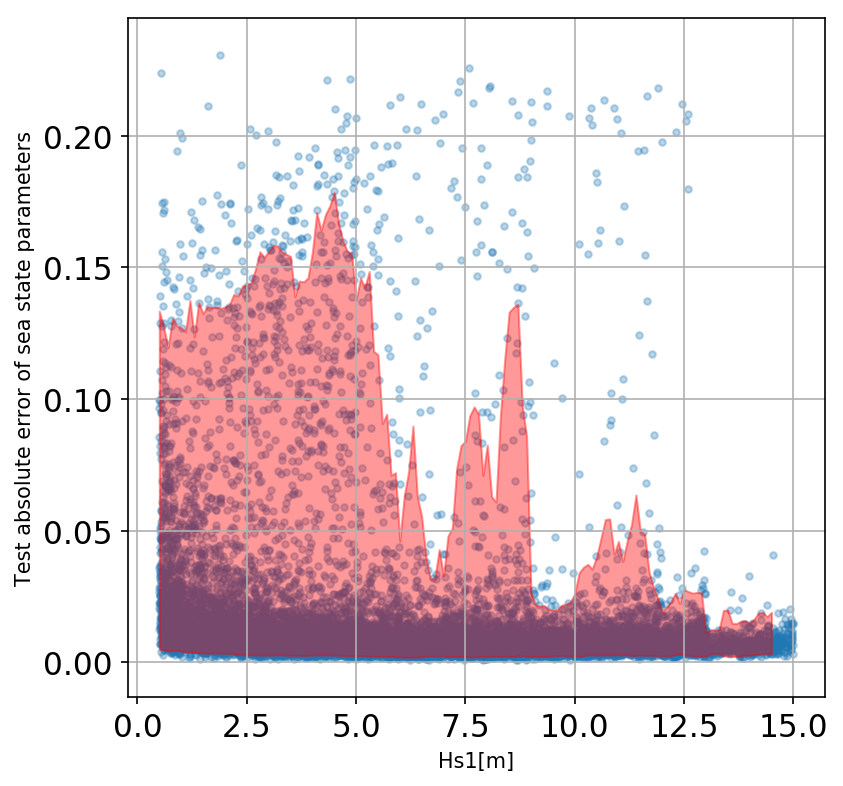

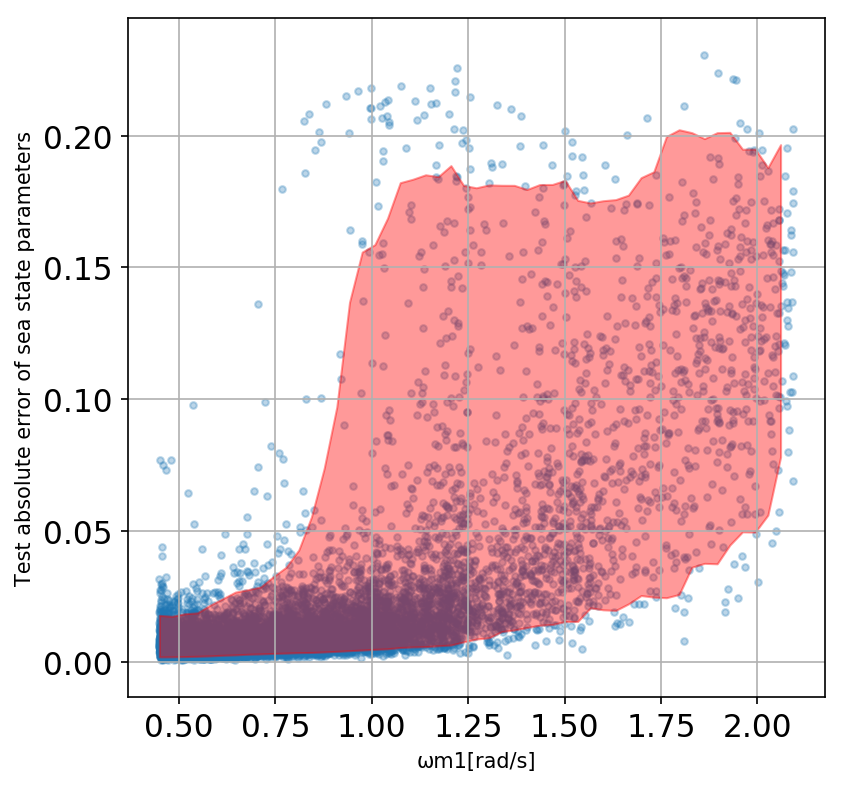

In [112]:
up=np.zeros(141)
down=np.zeros(141)
for i in range(141):
    b=loss_all[((parameters[:,0]-i/10-0.5)*(parameters[:,0]-i/10-1) <= 0)]
    up[i]=np.percentile(b,q=[2.5,97.5])[1]
    down[i]=np.percentile(b,q=[2.5,97.5])[0]

plt.figure(figsize=(6, 6), dpi=150)
plt.tick_params(labelsize=15)
plt.scatter(parameters[:,0],loss_all,s=10, alpha=0.3)
plt.fill_between(np.arange(141)/10+0.5,up,down,color='red',alpha=0.4)
plt.xlabel('Hs1[m]')
plt.ylabel('Test absolute error of sea state parameters')
#plt.ylim(-2,2)
plt.grid()
plt.show()



up=np.zeros(50)
down=np.zeros(50)
diff=(np.max(parameters[:,4])-np.min(parameters[:,4]))/50
for i in range(50):
    b=loss_all[((parameters[:,4]-i*diff-np.min(parameters[:,4]))*(parameters[:,4]-i*diff-np.min(parameters[:,4])-0.2) <= 0)]
    up[i]=np.percentile(b,q=[2.5,97.5])[1]
    down[i]=np.percentile(b,q=[2.5,97.5])[0]

plt.figure(figsize=(6, 6), dpi=150)
plt.tick_params(labelsize=15)
plt.locator_params(axis='x',nbins=8)
plt.scatter(parameters[:,4],loss_all,s=10, alpha=0.3)
plt.fill_between(np.arange(50)*diff+np.min(parameters[:,4]),up,down,color='red',alpha=0.4)
plt.xlabel('ωm1[rad/s]')
plt.ylabel('Test absolute error of sea state parameters')
#plt.ylim(-2,2)
plt.grid()
plt.show()

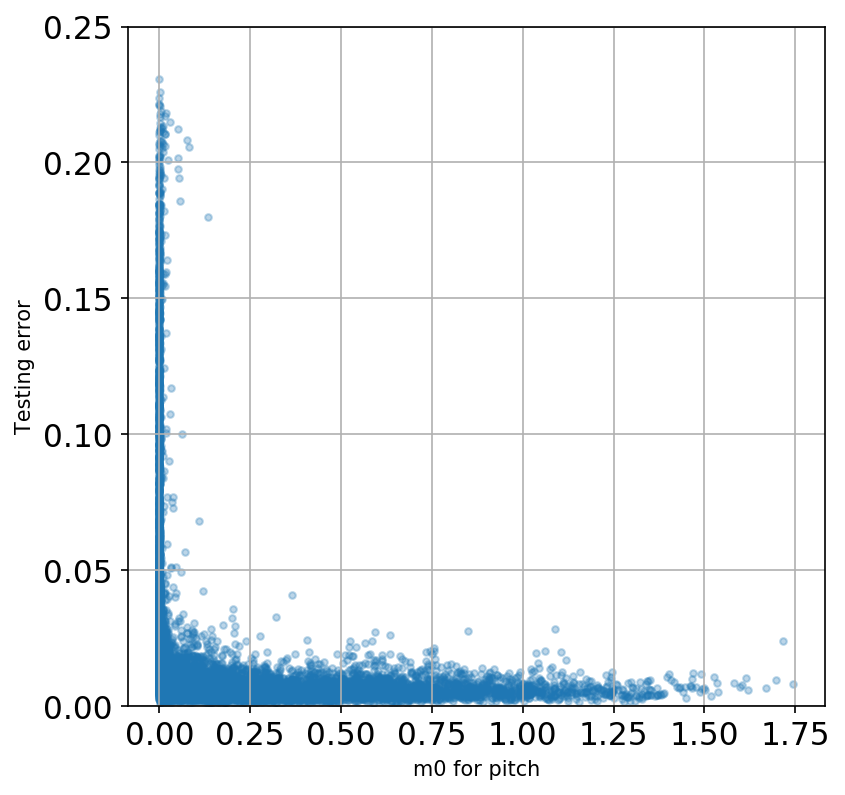

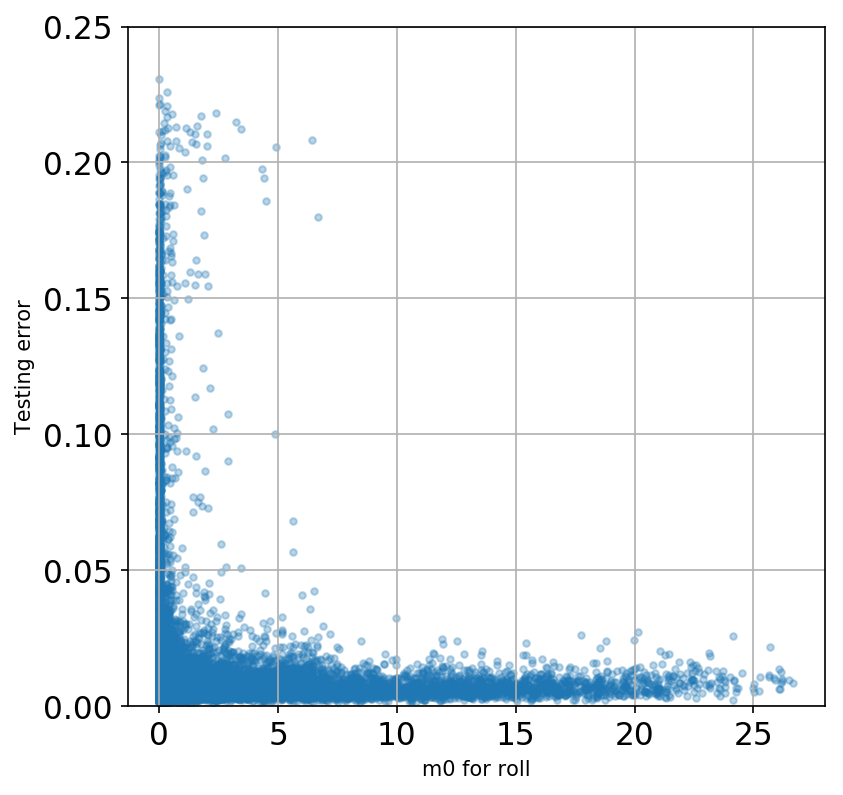

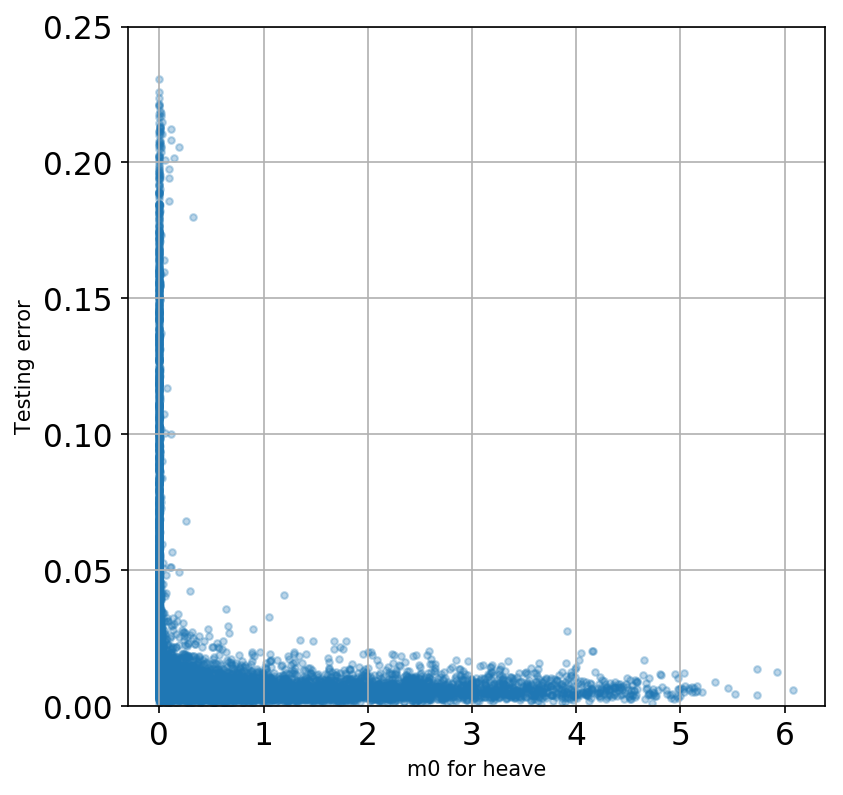

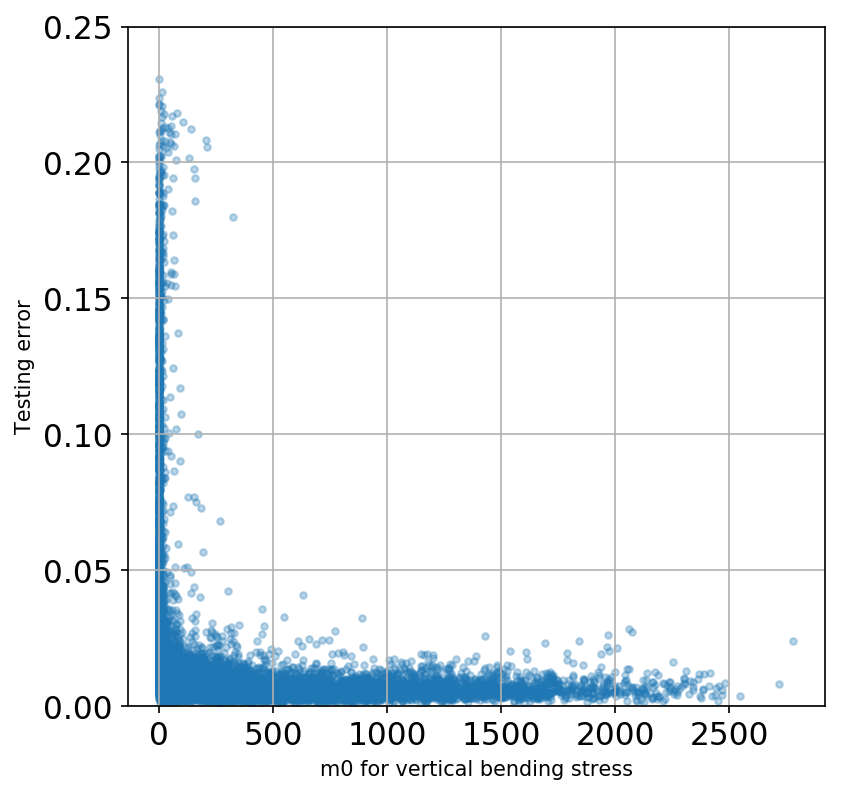

In [103]:
plt.figure(figsize=(6, 6), dpi=150)
plt.tick_params(labelsize=15)
plt.locator_params(axis='x',nbins=8)
plt.locator_params(axis='y',nbins=8)
plt.scatter(input_m0[:,0],loss_all,s=10, alpha=0.3)
plt.xlabel('m0 for pitch')
plt.ylabel('Testing error')
plt.ylim(0,0.25)
plt.grid()
plt.show()

plt.figure(figsize=(6, 6), dpi=150)
plt.tick_params(labelsize=15)
plt.locator_params(axis='x',nbins=8)
plt.locator_params(axis='y',nbins=8)
plt.scatter(input_m0[:,2],loss_all,s=10, alpha=0.3)
plt.xlabel('m0 for roll')
plt.ylabel('Testing error')
plt.ylim(0,0.25)
plt.grid()
plt.show()

plt.figure(figsize=(6, 6), dpi=150)
plt.tick_params(labelsize=15)
plt.locator_params(axis='x',nbins=8)
plt.locator_params(axis='y',nbins=8)
plt.scatter(input_m0[:,4],loss_all,s=10, alpha=0.3)
plt.xlabel('m0 for heave')
plt.ylabel('Testing error')
plt.ylim(0,0.25)
plt.grid()
plt.show()

plt.figure(figsize=(6, 6), dpi=150)
plt.tick_params(labelsize=15)
plt.locator_params(axis='x',nbins=8)
plt.locator_params(axis='y',nbins=8)
plt.scatter(input_m0[:,6],loss_all,s=10, alpha=0.3)
plt.xlabel('m0 for vertical bending stress')
plt.ylabel('Testing error')
plt.ylim(0,0.25)
plt.grid()
plt.show()

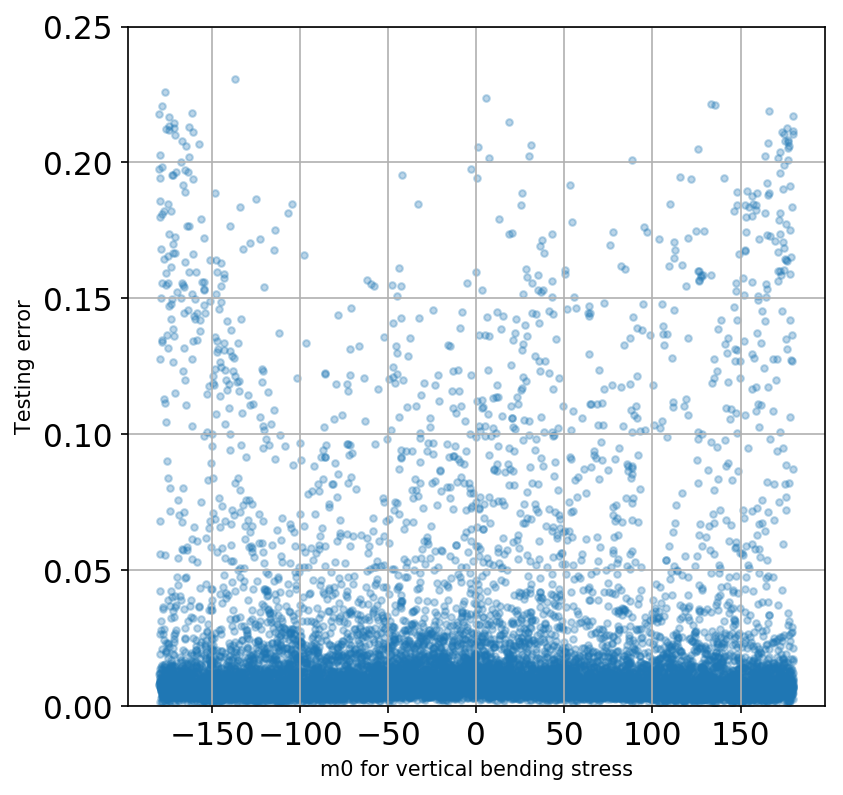

In [124]:
theta_95=180/np.pi*np.arctan2(parameters[:,2],parameters[:,1])
up=np.zeros(355)
down=np.zeros(355)
for i in range(355):
    b=loss_all[((theta_95-i+180)*(theta_95-i-10+180) <= 0)]
    up[i]=np.percentile(b,q=[2.5,97.5])[1]
    down[i]=np.percentile(b,q=[2.5,97.5])[0]

plt.figure(figsize=(6, 6), dpi=150)
plt.tick_params(labelsize=15)
plt.locator_params(axis='x',nbins=8)
plt.locator_params(axis='y',nbins=8)
plt.scatter(theta_95,loss_all,s=10, alpha=0.3)
#plt.fill_between(np.arange(355)-177.5,up,down,color='red',alpha=0.4)
plt.xlabel('m0 for vertical bending stress')
plt.ylabel('Testing error')
plt.ylim(0,0.25)
plt.grid()
plt.show()